# Universal Function for training the Neural Networks

## Load Libraries

In [1]:
import torch.nn as nn
import torch.nn.functional as F
from smartai.datasets import load_fashion_mnist
from smartai.models import optimizers
from smartai.models.nn import Model
from smartai.utils import plot_one_batch_images

%config InlineBackend.figure_format = 'svg'

## Load Dataset

In [2]:
fmnist = load_fashion_mnist()
fmnist_valid = load_fashion_mnist(train=False)

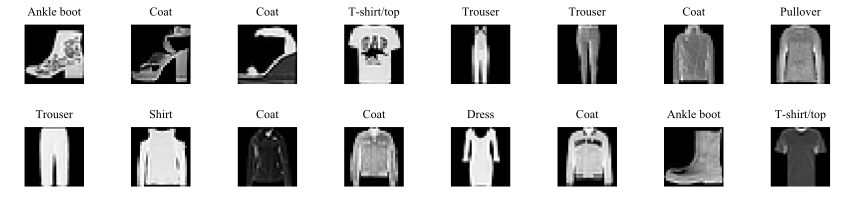

In [3]:
plot_one_batch_images(fmnist)

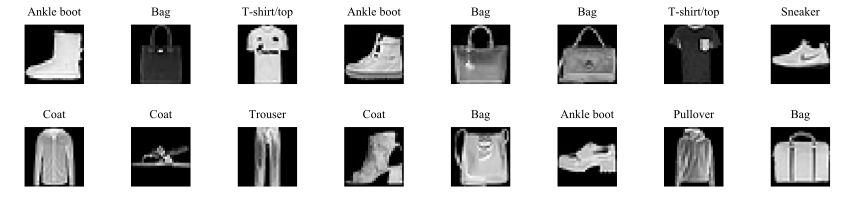

In [4]:
plot_one_batch_images(fmnist_valid)

## Define a Simple model

In [5]:
class Net(Model):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

In [6]:
model = Net()

## Show the Model Summary

In [7]:
model.summary(input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 24, 24]             260
            Conv2d-2             [-1, 20, 8, 8]           5,020
         Dropout2d-3             [-1, 20, 8, 8]               0
            Linear-4                   [-1, 50]          16,050
            Linear-5                   [-1, 10]             510
Total params: 21,840
Trainable params: 21,840
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.06
Params size (MB): 0.08
Estimated Total Size (MB): 0.15
----------------------------------------------------------------


## Train the Model

In [8]:
optimizer = optimizers.Adam(model.parameters())
criterion = nn.NLLLoss()

In [9]:
model.fit(fmnist, criterion, optimizer, valid_dataloader=fmnist_valid, num_epoches=2)

Start time: 2018-11-20 10:42:07
Training for 2 epoches on a new untrained model...
Training the model on: cpu



Train loss: 0.811734	Validation loss: 0.510165



Train loss: 0.603756	Validation loss: 0.447652
Best validation loss: 0.447652
End time: 2018-11-20 10:43:01
Time used: 0:00:53


**Continue training for more ephoches:**

In [10]:
model.fit(fmnist, criterion, optimizer, valid_dataloader=fmnist_valid, num_epoches=3)

Start time: 2018-11-20 10:43:01
Continue training for 3 epoches on an already trained model...
Training the model on: cpu



Train loss: 0.552176	Validation loss: 0.421444



Train loss: 0.519613	Validation loss: 0.399328



Train loss: 0.502542	Validation loss: 0.377492
Best validation loss: 0.377492
End time: 2018-11-20 10:44:20
Time used: 0:01:18


## Plot the Train History

Every model has his own memory, so plot the train history is just easy:

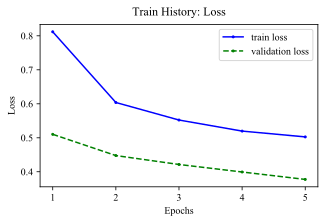

In [11]:
model.plot_train_history(subplot_width=5, subplot_height=3)